In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [13]:
# Load data
mnist = tf.keras.datasets.mnist
(training_sets, training_labels), (test_sets, test_labels) = mnist.load_data()

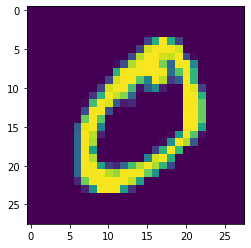

In [14]:
# print(training_labels[1])
# print(training_sets[1])
plt.imshow(training_sets[1])

In [15]:
# Normalizing
training_sets = training_sets / 255.0 
test_sets = test_sets / 255.0

In [16]:
# Design model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
# Compiling Loss function and Optimizer
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(training_sets, training_labels, epochs=5)

# Calling 'save('my_model')' creates a SaveModel folder 'my_model'
model.save('my_model.hp5')

Epoch 1/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2528 - acc: 0.92840s - loss: 0.2671 - acc: 0.
Epoch 2/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1125 - acc: 0.9669
Epoch 3/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0781 - acc: 0.97640s - loss: 0.0782 - acc: 0.976
Epoch 4/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0587 - acc: 0.9825
Epoch 5/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0455 - acc: 0.98600s - loss: 0.0432


In [17]:
# Test
model.evaluate(test_sets, test_labels)

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0737 - acc: 0.9784


[0.07372626211021562, 0.9784]

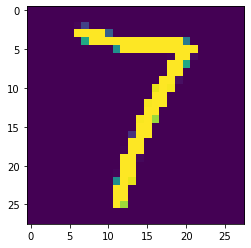

In [18]:
from PIL import Image
import os
import cv2
import numpy as np
    
IMG_DIR = './predict/'
img_array = cv2.imread(os.path.join(IMG_DIR, '7.png'), cv2.IMREAD_GRAYSCALE)
img_pil = Image.fromarray(img_array)
img_28x28 = np.array(img_pil.resize((28, 28))).astype(np.float)
img_28x28 = np.abs(img_28x28 - 255)
plt.imshow(img_28x28)

In [19]:
model.predict(img_28x28.reshape((1,28,28)))

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
model.predict_classes(img_28x28.reshape((1,28,28)))
# model.predict_classes(test_sets[1].reshape((1,28,28)))

array([3], dtype=int64)

In [21]:
# Lode model
import tensorflow as tf
model = tf.keras.models.load_model('my_model.hp5')

mnist = tf.keras.datasets.mnist
(training_sets, training_labels), (test_sets, test_labels) = mnist.load_data()
training_sets = training_sets / 255.0
test_sets = test_sets / 255.0

model.predict(test_sets[1].reshape(1,28,28))

model.predict_classes(test_sets[1].reshape(1,28,28))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


array([2], dtype=int64)